# Digit Classification with Support Vector Machines

Presented by:
<img src="./assets/represently-wordmark.png">

In [2]:
# import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
# from sklearn.cross_validation import cross_val_score
%matplotlib inline

In [3]:
# new dataset, handwritten digits!
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [4]:
len(digits.data)      # 1,797 observations

1797

In [5]:
len(digits.data[0])   # 8 x 8 pixel image

64

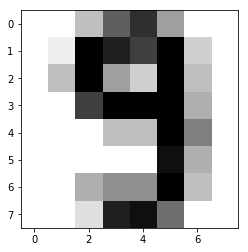

In [6]:
# the number 9
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')

In [6]:
digits.target[-5]# 9

9

In [7]:
# get X and y
digits_X, digits_y = digits.data, digits.target

In [9]:
# from the previous notebook, we found these parameters to yield a cross-val score of 98%
svc = svm.SVC(C=10.0, gamma=0.001)

In [10]:
# TTS
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, test_size=0.33, random_state=25)

/Users/JosephNelson/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
svc.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
y_pred = svc.predict(X_test)

In [13]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.98821548821548821

In [14]:
import pandas as pd
results = pd.DataFrame(svc.predict(X_test), columns=['predicted'])
results['true'] = y_test

In [15]:
results.head()

,predicted,true
0,4,4
1,0,0
2,2,2
3,4,4
4,0,0


In [16]:
# what indexes are causing problems
row_ids = results[results['predicted'] != results.true].index
print row_ids

Int64Index([92, 101, 116, 304, 322, 420, 473], dtype='int64')


In [17]:
# make a function to print those out
def print_number(index):
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r, interpolation='nearest'),"\n", "The model guessed this was:", results['predicted'].iloc[index], "\n", "This was meant to be:", results['true'].iloc[index],
    plt.show()
    print "The model guessed this was:", results['predicted'].iloc[index], "\n", "This was meant to be:", results['true'].iloc[index], "\n", "\n","\n"

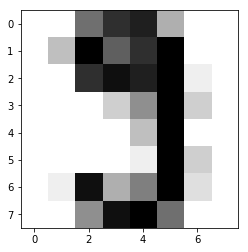

The model guessed this was: 9 
This was meant to be: 5 





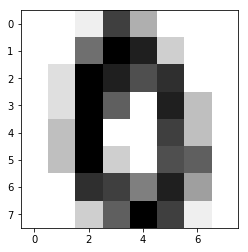

The model guessed this was: 8 
This was meant to be: 9 





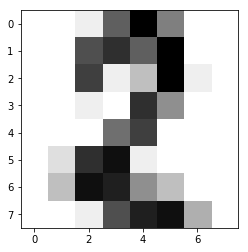

The model guessed this was: 8 
This was meant to be: 6 





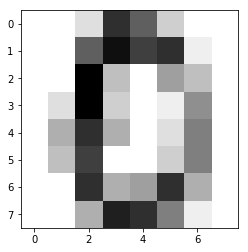

The model guessed this was: 8 
This was meant to be: 9 





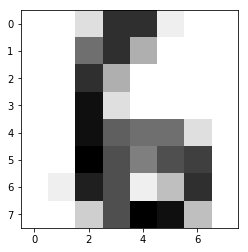

The model guessed this was: 9 
This was meant to be: 7 





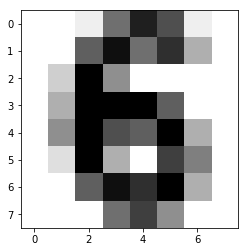

The model guessed this was: 1 
This was meant to be: 8 





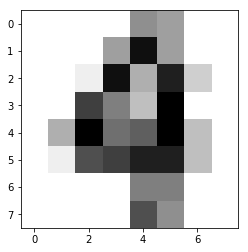

The model guessed this was: 5 
This was meant to be: 3 





In [18]:
for value in row_ids:
    print_number(value)